In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [3]:
vectorDim = 100

numNode = 1000

reps = 40 #50
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data_erd_states/mod_in_True_mod_topTrue_Direct_False_%s.npy' % res_seed

    sherl_erd_SortedStates = np.load(string1) 

    # get the pieces
    #sherl_erd_time1=sherl_erd_SortedStates[:,0:99]
    #sherl_erd_time2=sherl_erd_SortedStates[:,900:999]
    
    sherl_erd_time1=sherl_erd_SortedStates[:,100:199]
    sherl_erd_time2=sherl_erd_SortedStates[:,800:899]
 
    if res_seed == 0:
        sherl_erd_time1_cumul = sherl_erd_time1
        sherl_erd_time2_cumul = sherl_erd_time2
    else:
        sherl_erd_time1_cumul = sherl_erd_time1 + sherl_erd_time1_cumul
        sherl_erd_time2_cumul = sherl_erd_time2 + sherl_erd_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(sherl_erd_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(sherl_erd_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(sherl_erd_time1)
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(sherl_erd_time2)

        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-4400.953258938681
-4463.93323885374
4
res_seed =  0
Likelihood
-4439.777128621789
-4719.475884908709
6
res_seed =  0
Likelihood
-4394.096743035617
-4888.594473291313
8
res_seed =  0
Likelihood
-4425.686597663283
-5325.457120322618
10
res_seed =  0
Likelihood
-4461.429446756015
-5720.1918823224305
12
res_seed =  0
Likelihood
-4496.225557613115
-5805.745963266313
14
res_seed =  0
Likelihood
-4516.3845468877
-6386.783026850034
16
res_seed =  0
Likelihood
-4547.51651748567
-6994.70127385216
18
res_seed =  0
Likelihood
-4583.768134916563
-7751.369862272146
20
res_seed =  0
Likelihood
-4608.15104906461
-7892.795913167432
22
res_seed =  0
Likelihood
-4723.5613411301965
-9219.342241574495
24
res_seed =  0
Likelihood
-4768.768640432971
-10070.034177314752
26
res_seed =  0
Likelihood
-4630.5538535746855
-10938.336849576093
28
res_seed =  0
Likelihood
-4671.094139135557
-11224.033032453168
30
res_seed =  0
Likelihood
-4698.912988322283
-12595.572210735638
32
res_seed =

10
res_seed =  6
Likelihood
-4381.804407611917
-4436.954697380332
12
res_seed =  6
Likelihood
-4412.642243526805
-5079.166974012529
14
res_seed =  6
Likelihood
-4438.227043387172
-5632.468344462456
16
res_seed =  6
Likelihood
-4469.333217856429
-6508.840250572342
18
res_seed =  6
Likelihood
-4485.184640141179
-7181.58845684396
20
res_seed =  6
Likelihood
-4507.833153853115
-8403.076270547204
22
res_seed =  6
Likelihood
-4457.112381353122
-9360.896264115428
24
res_seed =  6
Likelihood
-4494.300348994823
-10612.333823993698
26
res_seed =  6
Likelihood
-4535.071508085293
-12082.136107688286
28
res_seed =  6
Likelihood
-4545.580139509592
-13569.885902990009
30
res_seed =  6
Likelihood
-4569.94398209512
-15193.758407100384
32
res_seed =  6
Likelihood
-4634.633293198835
-17033.64588737414
34
res_seed =  6
Likelihood
-4683.401043351176
-18335.158948761346
36
res_seed =  6
Likelihood
-4714.505991664947
-20078.15456770932
38
res_seed =  6
Likelihood
-4572.421782812865
-22625.88792395976
40
res_

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  9
Likelihood
-4746.943124451581
-33250.15091460901
40
res_seed =  9
Likelihood
-4806.409276425709
-34992.30186325093
2
res_seed =  10
Likelihood
-4619.841244154033
-4069.956688424325
4
res_seed =  10
Likelihood
-4557.326774736753
-4094.1195028323887
6
res_seed =  10
Likelihood
-4625.761059321072
-4430.976660795871
8
res_seed =  10
Likelihood
-4644.043101678648
-4822.289610238215
10
res_seed =  10
Likelihood
-4659.443752585044
-5338.4312359624655
12
res_seed =  10
Likelihood
-4443.90271519813
-6094.333054413402
14
res_seed =  10
Likelihood
-4472.5258933102
-6589.696225192806
16
res_seed =  10
Likelihood
-4505.997871926887
-7316.743822950953
18
res_seed =  10
Likelihood
-4551.3187455566695
-8271.239198418745
20
res_seed =  10
Likelihood
-4799.200815473934
-9626.897941813659
22
res_seed =  10
Likelihood
-4620.05782834276
-10620.237191365119
24
res_seed =  10
Likelihood
-4660.045726173819
-11944.452661570393
26
res_seed =  10
Likelihood
-4733.788884432151
-13479.546479674646
28

4
res_seed =  16
Likelihood
-4261.025506912672
-3470.7029422068354
6
res_seed =  16
Likelihood
-4212.039424360638
-3941.812226303391
8
res_seed =  16
Likelihood
-4209.375717896435
-4226.759360827442
10
res_seed =  16
Likelihood
-4222.005803958746
-4770.460173099589
12
res_seed =  16
Likelihood
-4245.247881274353
-5790.976829334313
14
res_seed =  16
Likelihood
-4414.567691594197
-6951.419288191576
16
res_seed =  16
Likelihood
-4432.373507980986
-8204.235596198441
18
res_seed =  16
Likelihood
-4465.222676410814
-9676.980659387345
20
res_seed =  16
Likelihood
-4512.274973263012
-11209.859979469476
22
res_seed =  16
Likelihood
-4552.009587726687
-13336.487367831302
24
res_seed =  16
Likelihood
-4578.678279434017
-15613.784950135558
26
res_seed =  16
Likelihood
-4669.498493054069
-17899.090373436677
28
res_seed =  16
Likelihood
-4696.70020295799
-20308.36576139739
30
res_seed =  16
Likelihood
-4600.111144244488
-22822.600691642867
32
res_seed =  16
Likelihood
-4778.719480267827
-25792.54428

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4524.819649273607
-11085.445242036914
16


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4542.713073987091
-12699.897577746067
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4445.959198761053
-16571.727126751935
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4519.914746239361
-19851.51037945824
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4525.634049144817
-23761.683003098355
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4565.063333998649
-27675.639312758605
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4604.269726568894
-31730.71061491922
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4599.04458196561
-36299.34751378479
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4668.405532820493
-40158.71409083043
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4605.368545304452
-46125.86790029353
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4624.867194794244
-55102.25115426931
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4750.457196436841
-60840.3332891609
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4774.0423929084245
-67169.82233695262
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  17
Likelihood
-4817.384456731187
-74168.85487094158
2
res_seed =  18
Likelihood
-4256.294105203298
-4586.1463110137465
4
res_seed =  18
Likelihood
-4002.6992202187876
-3793.9416359961933
6
res_seed =  18
Likelihood
-3994.902015598213
-4360.478701465279
8
res_seed =  18
Likelihood
-4193.5888702136845
-3546.99359146114
10
res_seed =  18
Likelihood
-4240.522467729164
-3739.659909670803
12
res_seed =  18
Likelihood
-4262.450491794066
-4195.904179412165
14
res_seed =  18
Likelihood
-4247.448256555493
-4690.677853018678
16
res_seed =  18
Likelihood
-4241.229555047533
-5254.024375656541
18
res_seed =  18
Likelihood
-4283.858971638818
-6005.511775714632
20
res_seed =  18
Likelihood
-4288.266256636853
-7666.343971758572
22
res_seed =  18
Likelihood
-4070.6455310921738
-8819.141462252579
24
res_seed =  18
Likelihood
-4096.550394552473
-8768.413732941306
26
res_seed =  18
Likelihood
-4203.606897492765
-10130.673936282295
28
res_seed =  18
Likelihood
-4144.462036228011
-11584.512128158

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4340.719677899872
-6125.271401300738
6


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4357.331726673376
-11525.34194054191
8


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4180.578527735606
-17109.767856829716
10


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4199.73234612036
-24339.27540070626
12


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4219.447514526434
-32752.188533180248
14


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4223.111497880045
-41744.97281540474
16


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4266.440319011865
-55627.7465527375
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4263.485274346721
-66798.75409860308
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4302.031400934097
-80430.33073350383
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4373.914677397156
-94990.05502861335
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4401.927680774203
-109694.80779642939
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4435.266741425519
-129501.25212243527
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4470.462539772672
-146447.5183078376
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4452.399442128305
-165651.16802068497
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4478.27556741741
-187398.52202886413
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4516.498893291827
-211967.1781920997
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4525.509104841146
-234960.38136654158
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4567.197941607375
-255052.63841671805
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-4186.557069741946
-282471.4444924226
2


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4558.997113774579
-5834.5485471946995
4


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4472.8874089602095
-6292.495863812315
6


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4499.084698509337
-7153.290757132392
8


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4378.799404597911
-8536.60067227968
10


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4451.9315461210435
-10079.513321964503
12


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4480.486095044532
-11538.783150687499
14


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4498.264762011535
-14375.907045955655
16


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4542.702961464962
-16763.235989707053
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4558.199842907123
-20137.435837693527
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4603.682676380142
-22253.91441814638
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4650.734405508097
-25576.46308104478
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4674.887993067387
-29957.028544361467
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4719.139583111647
-34038.446060282076
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4767.107100926959
-38040.860333023295
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4795.537714098628
-44410.17545755446
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4651.427210937024
-48660.689526836606
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4681.94529632476
-56607.427483145824
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4734.741720815616
-60303.75739433201
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4768.503400932062
-68916.19563515537
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  21
Likelihood
-4800.202909917769
-74992.34656712456
2
res_seed =  22
Likelihood
-4261.696784082434
-4227.653498539014
4
res_seed =  22
Likelihood
-4401.409206543376
-4367.098398454141
6
res_seed =  22
Likelihood
-4435.223507554324
-4781.508018062229
8
res_seed =  22
Likelihood
-4429.458285522032
-5308.287541590829
10
res_seed =  22
Likelihood
-4457.026058054641
-6279.490132956685
12
res_seed =  22
Likelihood
-4388.532592142893
-7024.582035236141
14
res_seed =  22
Likelihood
-4412.590125128879
-7857.08859609974
16
res_seed =  22
Likelihood
-4486.356250194744
-8672.316995504056
18
res_seed =  22
Likelihood
-4472.732942329784
-10109.30267151108
20
res_seed =  22
Likelihood
-4556.070440143805
-11538.221920820151
22
res_seed =  22
Likelihood
-4577.557267284704
-13023.354920423215
24
res_seed =  22
Likelihood
-4625.223780458886
-14071.476617552738
26
res_seed =  22
Likelihood
-4670.756770614295
-16244.579714783671
28
res_seed =  22
Likelihood
-4726.4204734094
-18568.694910460912


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4540.664454471265
-19053.776318661858
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4465.117281285377
-21298.22536921403
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4508.2285453514405
-23481.694183079355
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4534.661099787185
-26938.349784806993
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4556.946015749903
-29235.994198080072
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4401.512805102285
-32283.02516096357
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4639.063196964745
-35706.56352860345
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4459.240166420086
-38726.656544497004
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  24
Likelihood
-4483.826129229235
-41919.796486217776
2
res_seed =  25
Likelihood
-4602.840762984286
-4792.233531526469
4
res_seed =  25
Likelihood
-4561.40857513555
-4367.744562645967
6
res_seed =  25
Likelihood
-4281.191977409714
-4329.655277452743
8
res_seed =  25
Likelihood
-4276.808698417182
-4538.916810924863
10
res_seed =  25
Likelihood
-4292.1137230043005
-4530.314549630108
12
res_seed =  25
Likelihood
-4431.939589291393
-4818.326651123666
14
res_seed =  25
Likelihood
-4468.19519124056
-5329.553346754704
16
res_seed =  25
Likelihood
-4510.437482092899
-5733.16959480933
18
res_seed =  25
Likelihood
-4534.171641789561
-6303.511263345589
20
res_seed =  25
Likelihood
-4556.133589941766
-7066.217495750793
22
res_seed =  25
Likelihood
-4607.954753987515
-7747.780550792577
24
res_seed =  25
Likelihood
-4650.7094125822805
-8848.61529746352
26
res_seed =  25
Likelihood
-4730.056477522901
-9747.847802719773
28
res_seed =  25
Likelihood
-4758.676456323644
-10635.61250653773
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4476.957242722543
-20489.48262877484
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4527.284801076072
-22639.929416986644
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4571.805590166837
-25048.176298378363
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4599.18987706599
-27748.814012403407
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4627.461085721389
-30683.540258563502
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  30
Likelihood
-4654.7371702219325
-33308.18982061247
2
res_seed =  31
Likelihood
-4723.502016809531
-4262.476835843095
4
res_seed =  31
Likelihood
-4485.870963021912
-4324.045940844025
6
res_seed =  31
Likelihood
-4525.821450814327
-4551.793909568008
8
res_seed =  31
Likelihood
-4525.294682763503
-4365.522954876021
10
res_seed =  31
Likelihood
-4578.457023267056
-4414.818656771668
12
res_seed =  31
Likelihood
-4586.142255080952
-4774.570919602269
14
res_seed =  31
Likelihood
-4621.960157018561
-5117.623661161589
16
res_seed =  31
Likelihood
-4653.131859434702
-5919.955259446786
18
res_seed =  31
Likelihood
-4692.598883981092
-6906.149390542718
20
res_seed =  31
Likelihood
-4697.647275003283
-7448.044442454188
22
res_seed =  31
Likelihood
-4763.352856951399
-8135.229161491018
24
res_seed =  31
Likelihood
-4811.155725961368
-8491.015993636624
26
res_seed =  31
Likelihood
-4864.366606073977
-9383.653614998215
28
res_seed =  31
Likelihood
-4913.349236023879
-10680.631887340087


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4809.763336336371
-19655.658729392555
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4836.036598249054
-22480.185533355438
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4862.940574672738
-25160.293446450905
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4896.1359492913925
-28376.25843314278
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4950.687806557603
-31133.482506431577
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-5008.423136897719
-34613.187066293474
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4984.46333025133
-37483.453420641854
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4966.879355872234
-41471.27898396562
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  33
Likelihood
-4988.553615393493
-44852.08940892191
2
res_seed =  34
Likelihood
-4335.84487878585
-4579.046972705586
4
res_seed =  34
Likelihood
-4461.617875646894
-4689.296420648989
6
res_seed =  34
Likelihood
-4473.398060178069
-4756.924431767468
8
res_seed =  34
Likelihood
-4499.066537511899
-5007.558431197666
10
res_seed =  34
Likelihood
-4371.006613355347
-6419.584972402092
12


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4501.168532071527
-8292.806543517192
14


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4530.712929854361
-10251.133529214057
16


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4577.759476851028
-12244.818960394847
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4514.18843089489
-14956.193909336123
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4643.271736019339
-19267.36013998447
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4572.812572915799
-22570.30625185969
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4612.953858034498
-26707.284830244396
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4657.1968790200835
-31608.49205352111
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4583.898653108375
-36556.916520437444
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4622.614845676604
-42557.4879970431
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4648.794251358794
-48236.531167727786
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4634.266487883045
-53575.9777380656
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4807.990702964176
-60751.022670225095
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4240.448359960984
-67449.28661959173
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-4842.920135889261
-76112.11077123653
2
res_seed =  35
Likelihood
-4485.744137986546
-4401.58014057108
4
res_seed =  35
Likelihood
-4496.59788386056
-4060.6910429551535
6
res_seed =  35
Likelihood
-4519.341062854589
-4305.161093222082
8
res_seed =  35
Likelihood
-4560.478611086756
-4783.189229421076
10
res_seed =  35
Likelihood
-4598.05431009593
-4742.284854101733
12
res_seed =  35
Likelihood
-4623.849245336592
-5086.693269751205
14
res_seed =  35
Likelihood
-4654.699065609414
-5781.478848678054
16
res_seed =  35
Likelihood
-4699.106709105782
-6321.291629497653
18
res_seed =  35
Likelihood
-4694.026041677696
-7373.9920571697285
20
res_seed =  35
Likelihood
-4671.719085083904
-7900.652676416608
22
res_seed =  35
Likelihood
-4478.724778700726
-8756.381157485415
24
res_seed =  35
Likelihood
-4517.248725294689
-9804.754652112235
26
res_seed =  35
Likelihood
-4540.539885547624
-10815.754574154787
28
res_seed =  35
Likelihood
-4567.928209928505
-12026.936177592726
3

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4543.4528102802515
-28281.106484917174
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4464.624925080055
-31976.76814644269
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4485.682107474063
-35520.91159484722
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4748.308072608307
-38641.23739837129
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4781.7371017737705
-42748.180042134
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  37
Likelihood
-4787.9375116349365
-47466.72917101017
2
res_seed =  38
Likelihood
-4645.856079290762
-4274.968477922749
4
res_seed =  38
Likelihood
-4688.217065195495
-4255.770991066532
6
res_seed =  38
Likelihood
-4573.748632285945
-4414.611580577989
8
res_seed =  38
Likelihood
-4604.570760211741
-4489.744656312138
10
res_seed =  38
Likelihood
-4664.690272752738
-4809.677330079356
12
res_seed =  38
Likelihood
-4702.2507525465535
-5469.801996120981
14
res_seed =  38
Likelihood
-4566.466031497229
-6026.554666693126
16
res_seed =  38
Likelihood
-4612.259568031389
-7064.415430799361
18
res_seed =  38
Likelihood
-4627.988035763436
-8019.686849318831
20
res_seed =  38
Likelihood
-4651.200949732708
-9244.906965136035
22
res_seed =  38
Likelihood
-4702.399895451355
-10944.877928276062
24
res_seed =  38
Likelihood
-4747.2223588492625
-12112.788816012082
26
res_seed =  38
Likelihood
-4889.5247864298935
-14363.852412392476
28
res_seed =  38
Likelihood
-4891.525820181929
-16078.4913702

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4482.307439176855
-6940.870449526374
10


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4522.0586408237705
-8603.586188405043
12


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4562.774851323989
-10738.643936353628
14


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4515.340112175429
-13716.713490836308
16


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4565.393959895505
-16766.590044802644
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4548.313978992174
-20757.830333741378
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4625.886006931514
-25432.905369076292
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4623.403669271446
-30736.219679318703
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4666.860134552077
-36772.54864461853
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4705.434567402358
-43354.08351679796
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4715.835056566992
-49194.598851063776
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4731.081508487985
-57252.99856776779
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4767.8967914314935
-63776.02871552465
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4798.776810678034
-72805.7568982842
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4854.894432807595
-83107.3150712737
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-4647.363897847268
-92030.53824147263
40
res_seed =  39
Likelihood
-4675.072816021109
-101940.20961446778


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


In [5]:
#for the figure get the mean reservoir states
sherl_erd_time1_last = sherl_erd_time1
sherl_erd_time2_last = sherl_erd_time2

np.save('sherl_erd-time1-last-june10.npy', sherl_erd_time1) 
np.save('sherl_erd-time2-last-june10.npy', sherl_erd_time2) 



In [6]:
sherl_erd_time1 = np.load('sherl_erd-time1-last-june10.npy') 
sherl_erd_time2 = np.load('sherl_erd-time2-last-june10.npy') 


In [7]:
sherl_erd_time1 = sherl_erd_time1_cumul/reps
sherl_erd_time2 = sherl_erd_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('sherl_erd-time1-june10.npy', sherl_erd_time1) 
np.save('sherl_erd-time2-june10.npy', sherl_erd_time2) 

np.save('likelihood-june10.npy', likelihood) 

In [9]:
sherl_erd_time1 = sherl_erd_time1_last
sherl_erd_time2 = sherl_erd_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(sherl_erd_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(sherl_erd_time2[1000:1650,:])


for j in range(99):
    mean = sherl_erd_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        sherl_erd_time1[:,j] = sherl_erd_time1[:,j]/mean

for j in range(99):
    mean = sherl_erd_time2[:,j].mean()
    if abs(mean) > 0.01:
        sherl_erd_time2[:,j] = sherl_erd_time2[:,j]/mean

#save the data likelihood
#np.save('sherl_erd-time1-june6.npy', sherl_erd_time1) 
#np.save('sherl_erd-time2-june6.npy', sherl_erd_time2) 

#np.save('likelihood-june6.npy', likelihood) 

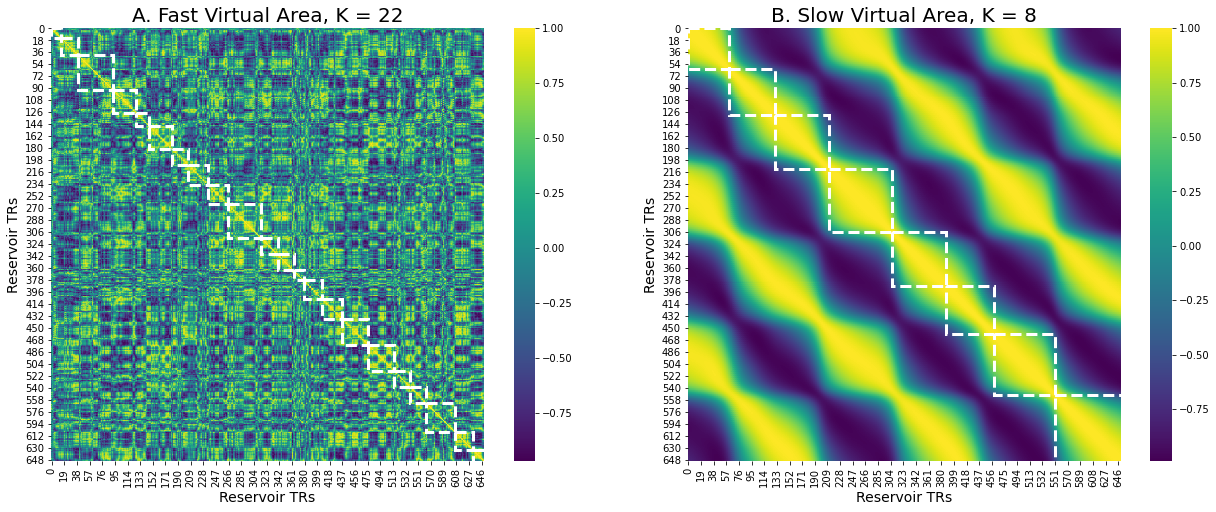

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-erd.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.01:
            print(i,j,t,p)


0 4 2.7856899669277633 0.00820361624287154
1 4 2.8672985019713737 0.006644505794774479
2 4 2.8827197210357975 0.0063828847635923275
3 4 3.1810895196326245 0.0028759115266908464
0 5 3.044204392564388 0.0041650829812461265
1 5 3.116356245501025 0.0034296406035699495
2 5 3.1915012414139903 0.002795174085642507
3 5 3.4394738335350956 0.0014018338487583259
4 5 3.571805110434104 0.0009615051213486144
0 6 3.3778468526635055 0.0016675532625085414
1 6 3.4439240171595333 0.001384302547748123
2 6 3.5485485272309565 0.0010277998417129583
3 6 3.7930464795514967 0.0005057123726483788
4 6 3.995223687440775 0.0002777956696125502
5 6 4.204358033440492 0.00014793321581723555
0 7 3.446888350284268 0.001372741391583861
1 7 3.495810338757876 0.0011947926718929131
2 7 3.5775729793027327 0.0009457109996226798
3 7 3.7403210904097834 0.0005901617240942205
4 7 3.8534224671903954 0.0004233446687420691
5 7 3.9087765936070498 0.00035936450722790647
6 7 3.5765091198096632 0.0009486052686702922
0 8 3.737246453854279

(20, 20)
49
2.4260988144267337e-05
3.6255406717412195e-05


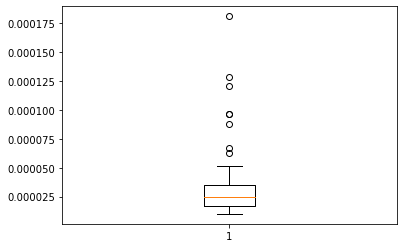

In [14]:
print(pmatrix.shape)

pmeans=np.zeros([50])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(3,8):
    for j in range(9,19):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

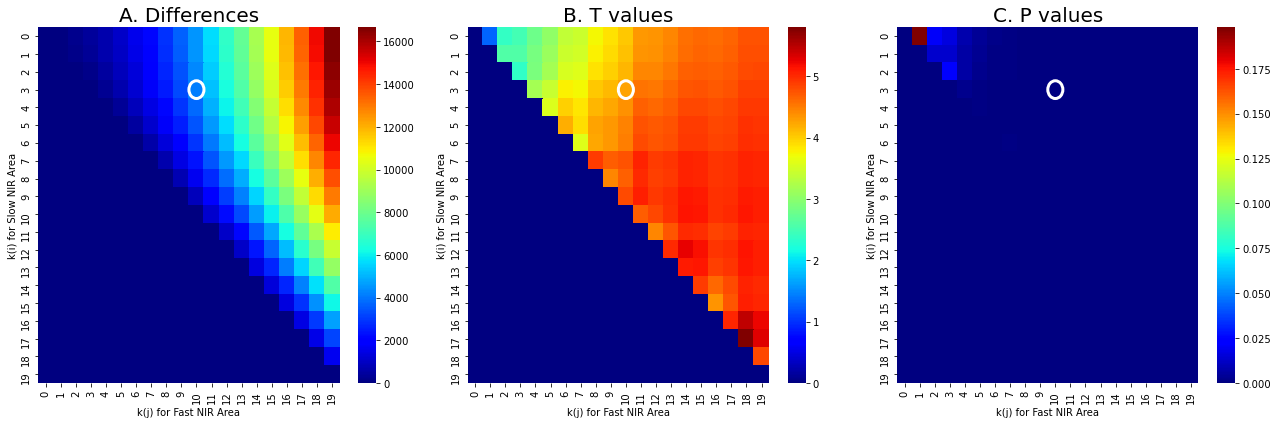

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm-erd.png')

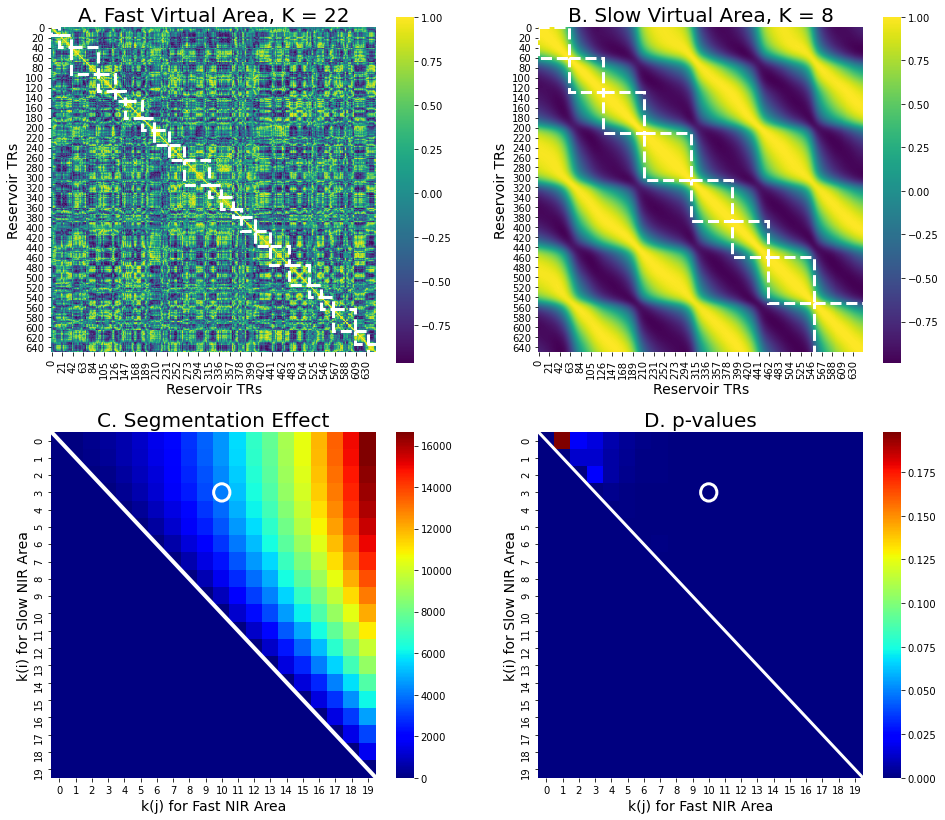

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd.png', dpi=600)


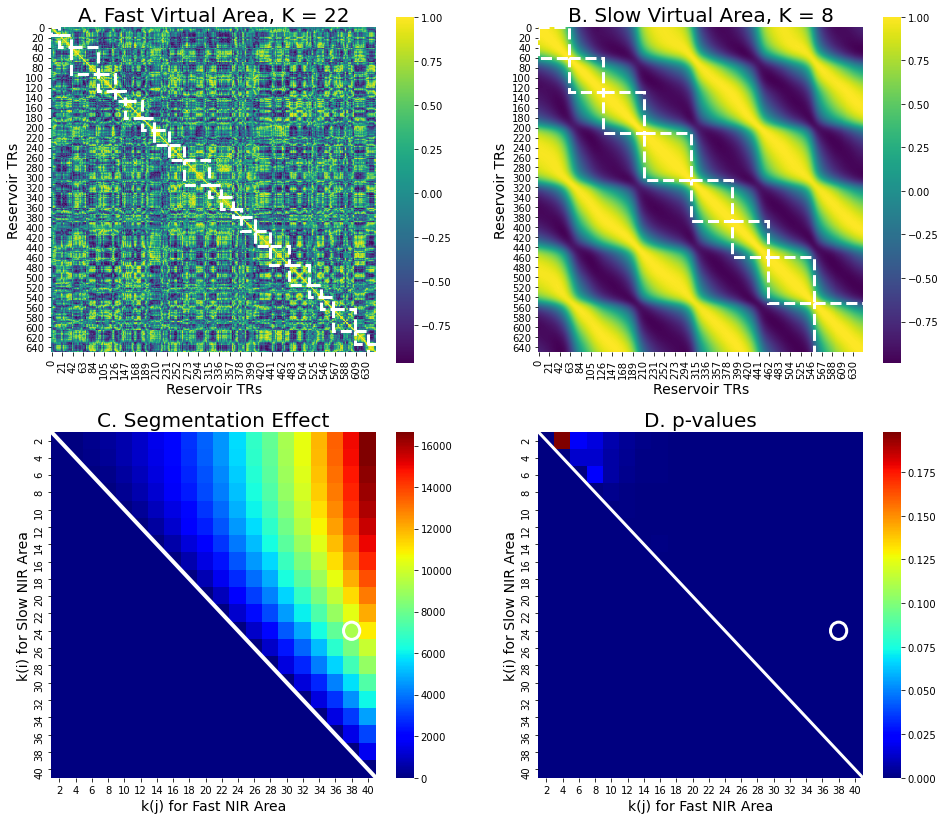

In [17]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

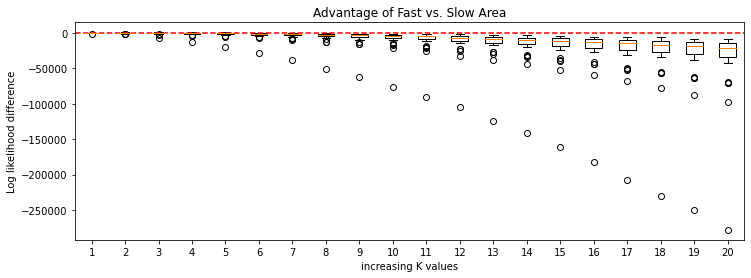

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4., 32.]),
 array([-49585.31677817, -45143.03032277, -40700.74386736, -36258.45741195,
        -31816.17095654, -27373.88450113, -22931.59804572, -18489.31159031,
        -14047.0251349 ,  -9604.73867949,  -5162.45222408]),
 <BarContainer object of 10 artists>)

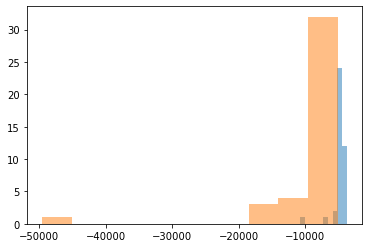

In [19]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f199c34d610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f199c34de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f199c34d250>,
 'medians': [<matplotlib.lines.Line2D at 0x7f199c358790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f199c358bd0>,
 'means': []}

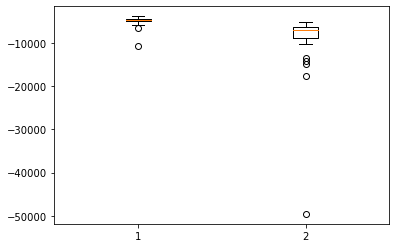

In [20]:
plt.boxplot([data4,data3])

In [21]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

4.272041579401111
0.00012039802623334503
4131.116579118031


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

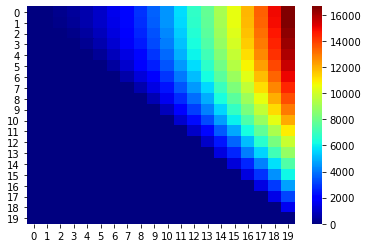

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[ 2170.51921886  3545.79625172  4860.25628052  6270.95992229
  7745.28659288  9300.1290365  10988.21626405]
[2.72780198e-05 1.19690406e-05 1.24878581e-05 1.93561588e-05
 1.66019154e-05 1.05015999e-05 1.15598460e-05]


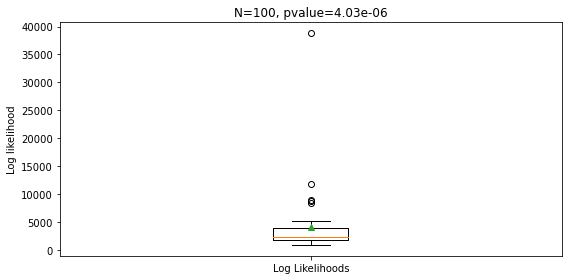

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

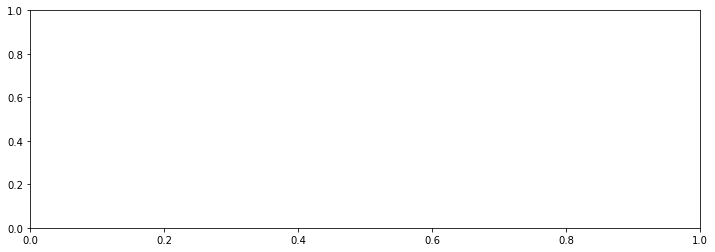

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [ ]:
likelihood = np.load('likelihood-june10.npy')

In [ ]:
#np.save('sherl_erd-time1-june6.npy', sherl_erd_time1) 
#np.save('sherl_erd-time2-june6.npy', sherl_erd_time2) 

#np.save('likelihood-june6.npy', likelihood) 

sherl_erd_time1 = np.load('sherl_erd-time1-last-june10.npy')
sherl_erd_time2 = np.load('sherl_erd-time2-last-june10.npy')

In [ ]:
sherl_erd_time1 = np.load('sherl_erd-time1-june10.npy')
sherl_erd_time2 = np.load('sherl_erd-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(sherl_erd_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(sherl_erd_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


